# Họ và Tên
# MSSV:

## Câu 1 (2 điểm) Chọn một ảnh bất kỳ (tự đặt tên, ví dụ `pic1.jpg`) và thực hiện:

- Làm mờ ảnh bằng box filter. (0.5 điểm)  
- Áp dụng Laplacian để phát hiện biên. (0.5 điểm)  
- Chuyển đổi ảnh sang ảnh âm bản (negative). (0.5 điểm)  
- Chuyển sang không gian màu HSV và lưu 3 kênh H, S, V riêng biệt.  lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm) (0.5 điểm)


In [ ]:
import cv2
import numpy as np

image = cv2.imread('bird.jpg')

# box filter
lammo = cv2.blur(image, (5, 5))
cv2.imwrite('bird_lam_mo.jpg', lammo)

# laplacian
xam = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(xam, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)
cv2.imwrite('bird_laplacian.jpg', laplacian_abs)

# âm bản
amban = 255 - image
cv2.imwrite('bird_am_ban.jpg', amban)

# chuyển sang hsv và lưu riêng biệt 3 kênh dưới dạng gray scale
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue, satuation, value = cv2.split(hsv)
cv2.imwrite('bird_L.jpg', hue)
cv2.imwrite('bird_A.jpg', satuation)
cv2.imwrite('bird_B.jpg', value)


True

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật chuyển đổi không gian màu và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Chuyển sang ảnh xám (Grayscale) (0.5 điểm)  
* Chuyển sang HSV (0.5 điểm)  
* Chuyển sang LAB (0.5 điểm)  
* Cân bằng histogram (0.5 điểm)  
* Adaptive Thresholding (tham số ngẫu nhiên) (0.5 điểm)  
* CLAHE (Contrast Limited Adaptive Histogram Equalization) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* G: Grayscale  
* H: HSV  
* L: LAB  
* Q: Histogram Equalization  
* A: Adaptive Threshold  
* C: CLAHE (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_gray_flower.jpg`, `result_clahe_img1.jpg` (0.5 điểm)


Danh sách hình ảnh trong thư mục 'exercise':
1. boat.jpg
2. bird.jpg
3. orange.jpg

Chọn phương pháp xử lý ảnh:
G - Grayscale
H - HSV
L - LAB
Q - Histogram Equalization
A - Adaptive Thresholding
C - CLAHE


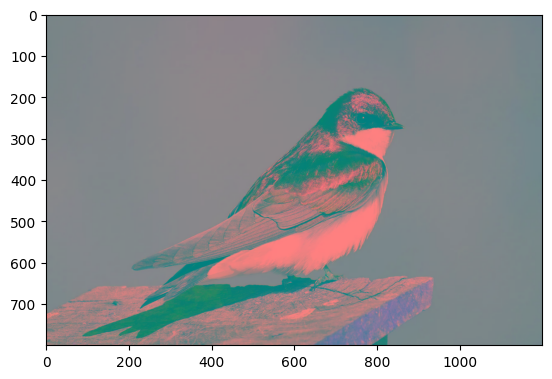

Đã lưu ảnh kết quả: result_lab_bird.jpg


In [1]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2
import os

folder = 'image_kiemtra'


def hienthi(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img.astype(np.uint8))
    plt.show()

# Các hàm xử lý ảnh
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def chuyenHSV(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

def chuyenLAB(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

def canbanghistogram(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.equalizeHist(gray)

def adaptive_threshold(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.adaptiveThreshold(gray, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

def claheenhancement(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(gray)

files = [f for f in os.listdir(folder) if f.lower().endswith('.jpg')]
if not files:
    print("Không tìm thấy ảnh trong thư mục.")
    exit()


print("Danh sách hình ảnh trong thư mục 'exercise':")
for i, f in enumerate(files):
    print(f"{i+1}. {f}")


index = int(input("Chọn số thứ tự ảnh muốn xử lý: ")) - 1
if index < 0 or index >= len(files):
    print("Lựa chọn không hợp lệ.")
    exit()

file_chon = files[index]
duong_dan = os.path.join(folder, file_chon)
img = iio.imread(duong_dan)

# menu
print("\nChọn phương pháp xử lý ảnh:")
print("G - Grayscale")
print("H - HSV")
print("L - LAB")
print("Q - Histogram Equalization")
print("A - Adaptive Thresholding")
print("C - CLAHE")

choice = input("Nhập lựa chọn của bạn (G : H : L : Q : A : C): ").strip().upper()

tenphuongphap = ''
ketqua = None

if choice == 'G':
    tenphuongphap = 'gray'
    ketqua = grayscale(img)
elif choice == 'H':
    tenphuongphap = 'hsv'
    ketqua = chuyenHSV(img)
elif choice == 'L':
    tenphuongphap = 'lab'
    ketqua = chuyenLAB(img)
elif choice == 'Q':
    tenphuongphap = 'hist'
    ketqua = canbanghistogram(img)
elif choice == 'A':
    tenphuongphap = 'adaptive'
    ketqua = adaptivethreshold(img)
elif choice == 'C':
    tenphuongphap = 'clahe'
    ketqua = claheenhancement(img)
else:
    print("Lựa chọn không hợp lệ.")
    exit()


hienthi(ketqua)
ten_file_anh = os.path.splitext(file_chon)[0]
ten_luu = f"result_{tenphuongphap}_{ten_file_anh}.jpg"
cv2.imwrite(ten_luu, cv2.cvtColor(ketqua, cv2.COLOR_RGB2BGR))
print(f"Đã lưu ảnh kết quả: {ten_luu}")


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Cắt ảnh đầu tiên theo tỉ lệ 80% ở giữa. (0.5 điểm)  
* Xoay ảnh thứ hai 90 độ và lật dọc. (0.5 điểm)  
* Thu nhỏ ảnh thứ ba xuống 1/3 kích thước ban đầu và áp dụng Median Blur với kernel 7x7. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.7, 1.8], \quad \beta \in [-40, 40]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


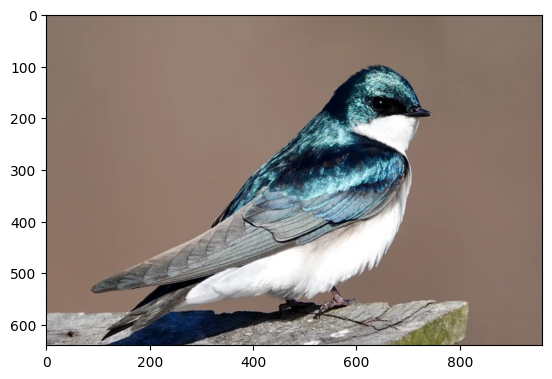

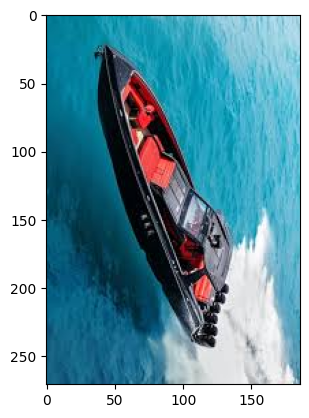

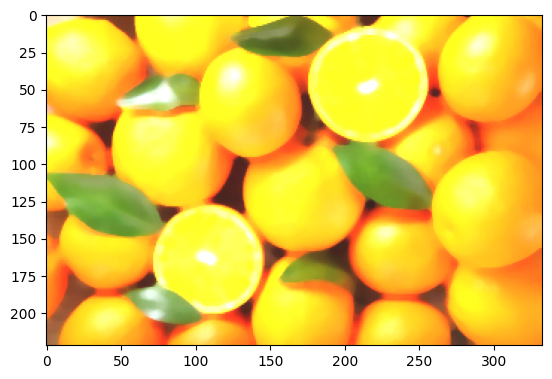

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hien_thi_anh(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(img_rgb)
    plt.show()


bird = cv2.imread('bird.jpg')
boat = cv2.imread('boat.jpg')
orange = cv2.imread('orange.jpg')

# ảnh 1
if bird is not None:
    h_bird, w_bird = bird.shape[:2]
    h_crop = int(h_bird * 0.8) 
    w_crop = int(w_bird * 0.8)
    x_start = (w_bird - w_crop) // 2
    y_start = (h_bird - h_crop) // 2
    bird_crop = bird[y_start:y_start + h_crop, x_start:x_start + w_crop]
    hien_thi_anh(bird_crop)
    cv2.imwrite("bird_cat.jpg", bird_crop)

# ảnh 2
if boat is not None:
    boat_xoay = cv2.rotate(boat, cv2.ROTATE_90_CLOCKWISE)
    boat_lat = cv2.flip(boat_xoay, 0)
    hien_thi_anh(boat_lat)
    cv2.imwrite("boat_xoay_lat.jpg", boat_lat)
# ảnh 3
if orange is not None:
    h_org, w_org = orange.shape[:2]
    new_size = (w_org // 3, h_org // 3)
    orange_resized = cv2.resize(orange, new_size, interpolation=cv2.INTER_AREA)
    orange_blur = cv2.medianBlur(orange_resized, 7)
    alpha = 1.4
    beta = 30
    orange_adjusted = np.clip(alpha * orange_blur + beta, 0, 255).astype(np.uint8)
    hien_thi_anh(orange_adjusted)
    cv2.imwrite("orange_da_xu_ly.jpg", orange_adjusted)


# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.